In [1]:
zip_path = '/content/drive/My\ Drive/Datasets/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

# !rm /content/cats-dogs.zip

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import LeakyReLU


from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [14]:
model = Sequential()
# model.add(Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.1), kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

# opt = SGD(lr=0.001, momentum=0.9)
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               40960128  
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [18]:
dataset_dir = '/content/'

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_aug_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_aug_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

# train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
# test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [19]:
history_base_model = model.fit_generator(train_aug_iterator, steps_per_epoch=len(train_aug_iterator), validation_data=test_aug_iterator, validation_steps=len(test_aug_iterator), epochs=75)

Epoch 1/75
100/100 [==============================] - 141s 1s/step - loss: 0.6251 - accuracy: 0.6537 - val_loss: 0.5772 - val_accuracy: 0.6874
Epoch 2/75
100/100 [==============================] - 141s 1s/step - loss: 0.5745 - accuracy: 0.6975 - val_loss: 0.5461 - val_accuracy: 0.7242
Epoch 3/75
100/100 [==============================] - 141s 1s/step - loss: 0.5591 - accuracy: 0.7166 - val_loss: 0.5406 - val_accuracy: 0.7265
Epoch 4/75
100/100 [==============================] - 141s 1s/step - loss: 0.5373 - accuracy: 0.7293 - val_loss: 0.5020 - val_accuracy: 0.7575
Epoch 5/75
100/100 [==============================] - 137s 1s/step - loss: 0.5212 - accuracy: 0.7398 - val_loss: 0.4824 - val_accuracy: 0.7660
Epoch 6/75
100/100 [==============================] - 135s 1s/step - loss: 0.5043 - accuracy: 0.7558 - val_loss: 0.4703 - val_accuracy: 0.7820
Epoch 7/75
100/100 [==============================] - 134s 1s/step - loss: 0.4890 - accuracy: 0.7653 - val_loss: 0.5156 - val_accuracy: 0.7749

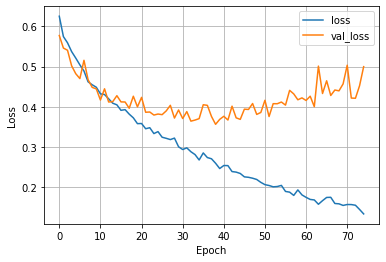

In [20]:
plot_loss(history_base_model)

Untuk hasil terbaik di dapatkan pada Epoch 39 dengan nilai loss: 0.2600 - accuracy: 0.8937 - val_loss: 0.3567 - val_accuracy: 0.8512